# Dataproject Analysis of surface tempertaure of earth

### Files / datasets
Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)  
Global Average Land Temperature by State (GlobalLandTemperaturesByState.csv)  
Global Land Temperatures By Major City (GlobalLandTemperaturesByMajorCity.csv)   
The raw data comes from the Berkeley Earth data page.  

### Questions - GlobalLandTemperaturesByCountry.csv
1 to know the avg temperature for different countries by a period of [25years]  
2.which country has highest mean temperature till last  
3.which country has lowest mean temperature till last  
4.In a country  to know the mean  temperatures by months (mean of months in every year)   

### Global Average Land Temperature by India (GlobalLandTemperaturesByState.csv) 
1 to know the avg temperature for different states by a period of [25years]    
2.which State has highest mean temperature till last  
3.which State has lowest mean temperature till last  
4.In a State  to know the mean  temperatures by months (mean of months in every year) 

In [2]:
import pandas as pd
import numpy as np
import datetime as date
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

## Part 1

In [3]:
#Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)
avglantempcon=pd.read_csv(r"C:\Users\Umesh Potha\Desktop\climatedataglobal\GlobalLandTemperaturesByCountry.csv")

In [4]:
avglantempcon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
avglantempcon.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


for easy in through time series we convert the strings of dt column to datetime time type using the inbuilt to _datetime method()  

In [6]:
avglantempcon['dt']=pd.to_datetime(avglantempcon['dt'])

Since all the data in other datases are not from the same date lets drop the all rows upto 1855

In [7]:
avglantempcon=avglantempcon[avglantempcon['dt']>='1850-01-01']

In [8]:
avglantempcon

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1274,1850-01-01,-9.083,1.834,Åland
1275,1850-02-01,-2.309,1.603,Åland
1276,1850-03-01,-4.801,3.033,Åland
1277,1850-04-01,1.242,2.008,Åland
1278,1850-05-01,7.920,0.881,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


we skip the null values in our dataset as droping them may lead time series breakdown 

lets find avg temp of whole country by years 

In [9]:
ser1=avglantempcon['Country'].unique()


In [10]:
avglantempcon['year'] = avglantempcon['dt'].dt.year

In [11]:
avglantempcon['month'] = avglantempcon['dt'].dt.month

In [12]:
grouped=avglantempcon.groupby('year')['AverageTemperature']

In [13]:
avgmean=grouped.mean()

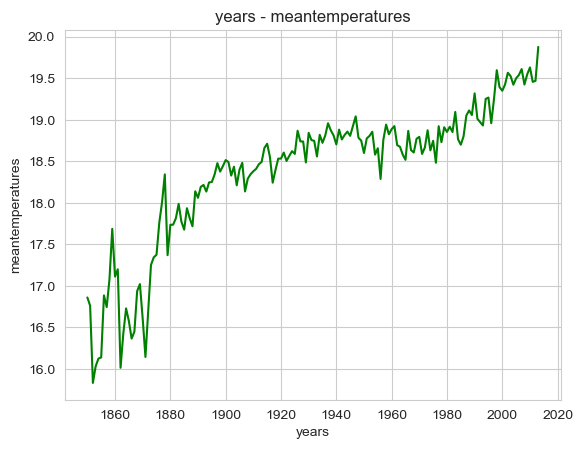

In [14]:
plt.ylabel('meantemperatures')
plt.xlabel('years')
plt.title('years - meantemperatures')
plt.plot(avgmean,color='green')

In [15]:
grouped1=avglantempcon.groupby('Country')['AverageTemperature']

In [16]:
avgtempcon=grouped1.mean()

In [17]:
lst=list(avgtempcon.index)

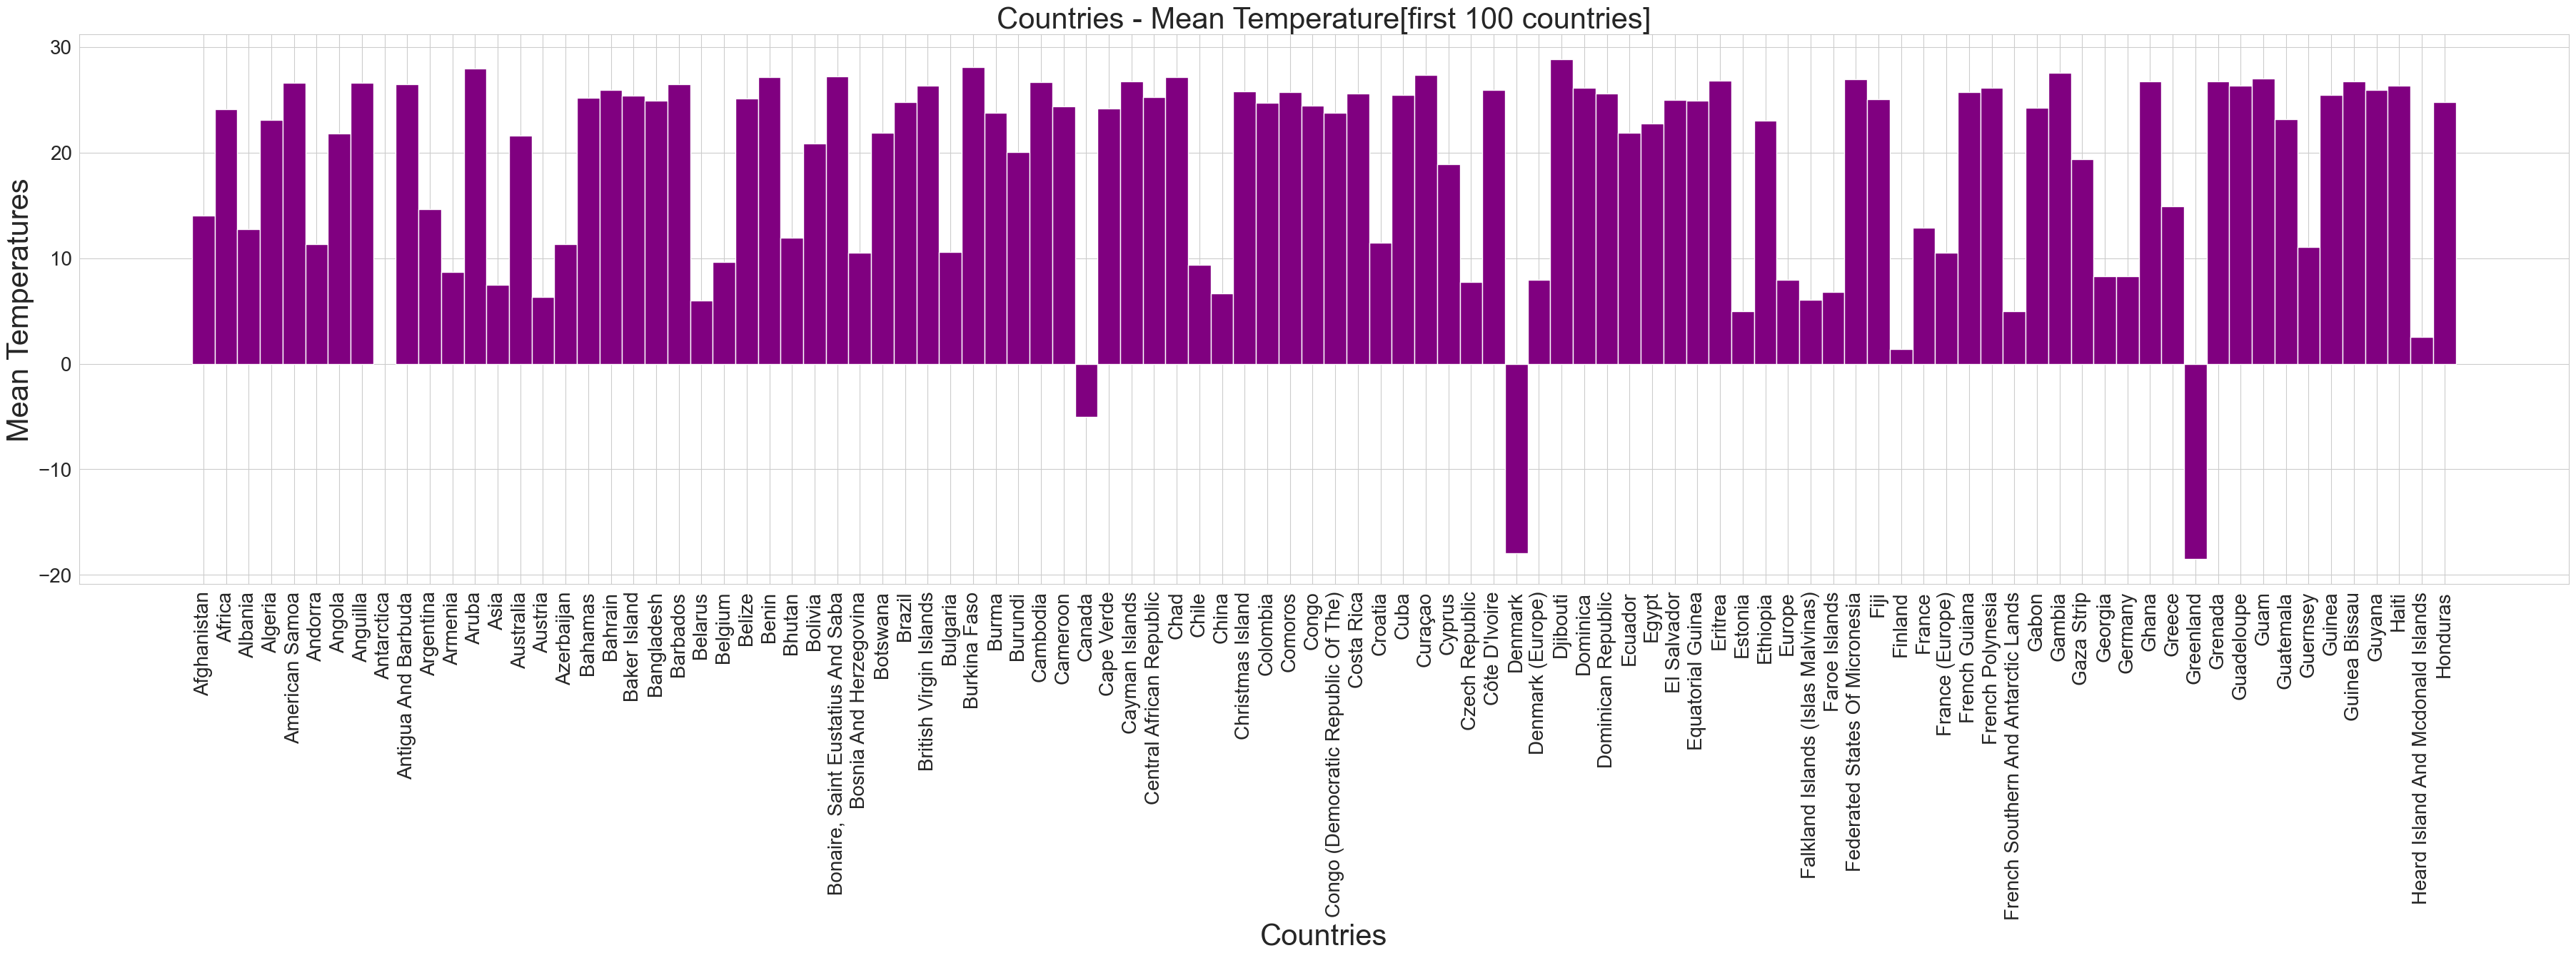

In [18]:
plt.figure(figsize=(45,10))
plt.bar(lst[0:100],avgtempcon[0:100],color='purple',width=1)
_=plt.xticks(rotation=90,fontsize=20)
_=plt.yticks(fontsize=20)
_=plt.xlabel('Countries',fontsize=30)
_=plt.ylabel('Mean Temperatures',fontsize=30)
_=plt.title('Countries - Mean Temperature[first 100 countries]',fontsize=30)

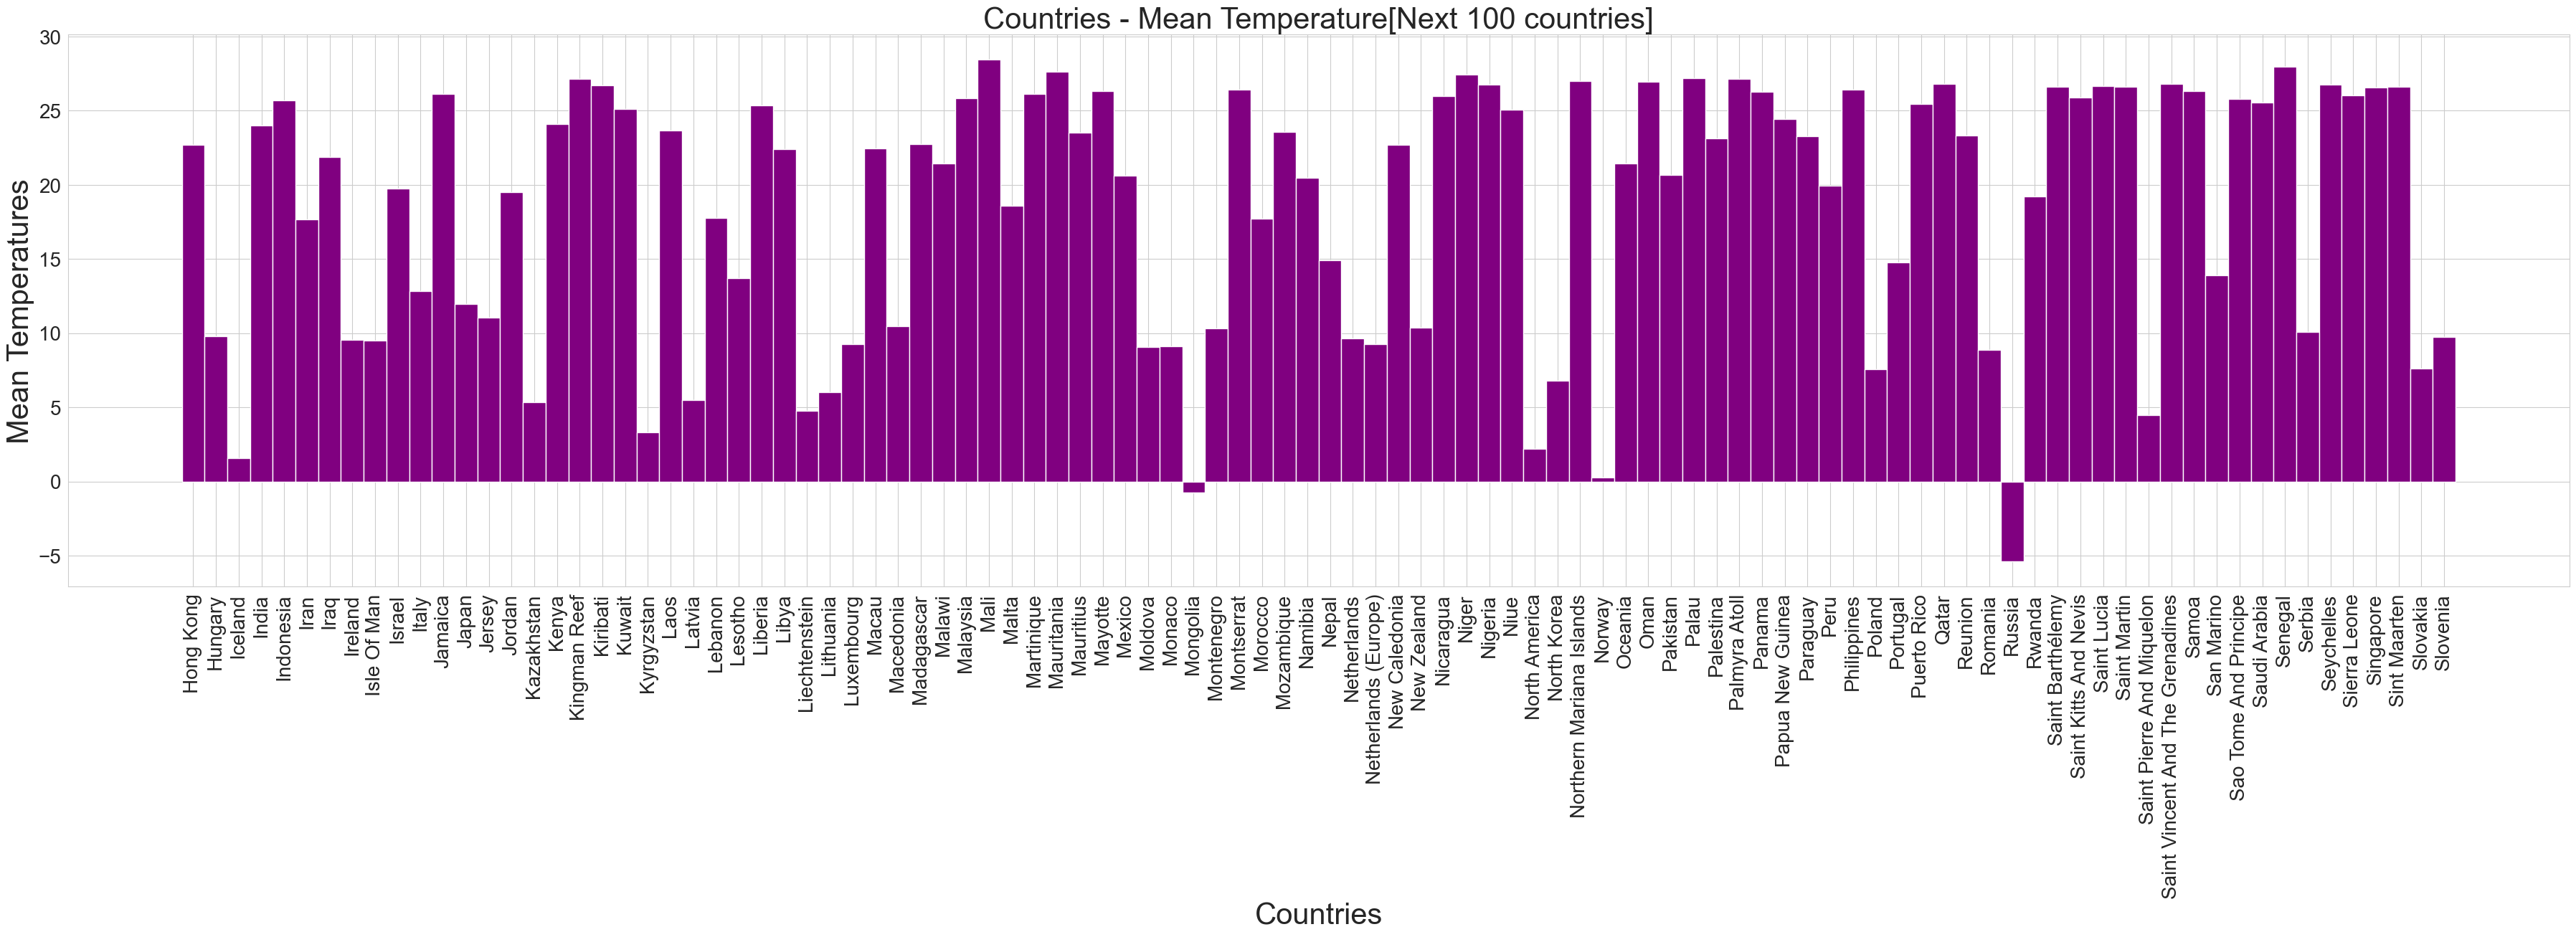

In [19]:
plt.figure(figsize=(45,10))
plt.bar(lst[100:200],avgtempcon[100:200],color='purple',width=1)
_=plt.xticks(rotation=90,fontsize=20)
_=plt.yticks(fontsize=20)
_=plt.xlabel('Countries',fontsize=30)
_=plt.ylabel('Mean Temperatures',fontsize=30)
_=plt.title('Countries - Mean Temperature[Next 100 countries]',fontsize=30)

In [20]:
grouped2 = avglantempcon.groupby(['year', 'Country'])['AverageTemperature']

In [21]:
avg_mean_by_year_country =grouped2.mean()

In [22]:
dataset=avg_mean_by_year_country.unstack()

In [23]:
dataset

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua And Barbuda,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
year,,,,,,,,,,,,,,,,,,,,,
1850,13.326083,23.672273,11.734667,22.587333,NaN,10.651750,NaN,26.106333,NaN,25.933250,...,NaN,11.618333,24.539167,23.198417,25.855667,22.182250,NaN,20.423182,20.154364,4.648667
1851,13.605667,NaN,12.315500,22.733333,NaN,10.297083,NaN,26.261250,NaN,26.060917,...,16.840417,12.042750,24.605250,23.352583,26.006333,22.487000,NaN,NaN,NaN,5.306333
1852,13.541167,NaN,12.744583,22.856583,NaN,11.503750,NaN,26.026000,NaN,25.855167,...,16.806167,11.875833,24.491583,23.219333,25.738167,22.128000,NaN,NaN,NaN,4.995667
1853,13.455833,NaN,12.811167,22.770583,NaN,10.111333,NaN,26.241500,NaN,26.076583,...,16.780000,11.667750,24.623083,23.504250,25.973833,21.986333,NaN,NaN,NaN,4.907750
1854,13.605750,NaN,11.951667,22.481167,NaN,10.682417,NaN,26.165333,NaN,25.983583,...,16.951833,12.074583,24.572583,23.497250,25.890167,22.003667,NaN,NaN,NaN,5.626667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,15.257750,25.026500,13.844250,24.154333,27.034250,12.566667,22.316500,27.468583,NaN,27.277333,...,17.871333,13.700333,26.084917,24.465583,27.238500,23.381083,27.342417,21.670250,21.377250,6.489083
2010,15.828667,25.472500,13.775417,25.215667,27.453417,11.480833,22.681500,27.856000,NaN,27.735417,...,17.920083,14.325917,26.150250,24.833333,27.593667,24.114250,27.302750,22.267500,21.986250,4.861917
2011,15.518000,24.786500,13.443250,24.144167,27.009500,12.994417,22.029667,27.528333,NaN,27.296167,...,17.824583,13.141083,25.677333,23.692583,27.159250,23.401250,27.288250,21.771583,21.602417,7.170750


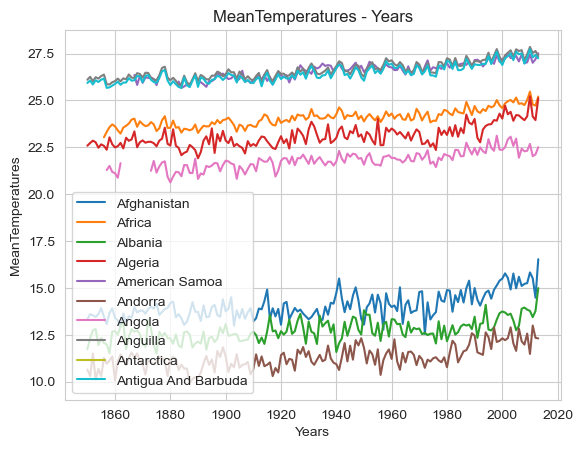

In [24]:
for x in dataset.columns[0:10]:
    plt.plot(dataset.index,dataset[x],label=x)
plt.title('MeanTemperatures - Years')
plt.ylabel('MeanTemperatures')
plt.xlabel('Years')
plt.legend(loc='best')    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


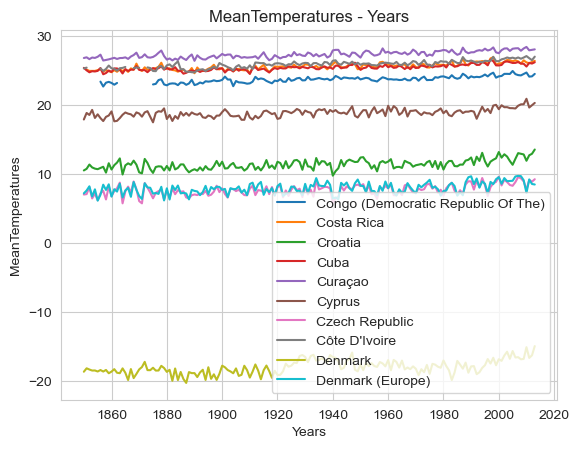

In [25]:
plt.title('MeanTemperatures - Years')
plt.ylabel('MeanTemperatures')
plt.xlabel('Years')
plt.legend(loc='best') 
for x in dataset.columns[50:60]:
    plt.plot(dataset.index,dataset[x],label=x)
plt.legend(loc='best')    

In [26]:
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

avglantempcon['month'] = avglantempcon['month'].map(month_names)

In [27]:
grouped3=avglantempcon.groupby('month')['AverageTemperature']
avgmeanmonth=grouped3.mean()

In [28]:
avgmeanmonth=avgmeanmonth.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


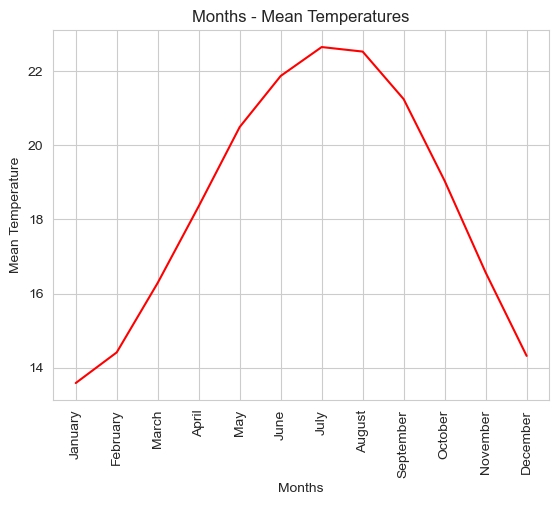

In [29]:
plt.title('Months - Mean Temperatures')
plt.xlabel('Months')
plt.ylabel('Mean Temperature')
_=plt.xticks(rotation=90)
plt.plot(avgmeanmonth,color='red')
plt.show()

In [30]:
grouped4 = avglantempcon.groupby(['month', 'Country'])['AverageTemperature']

In [31]:
avgmeantempmon=grouped4.mean()

In [35]:
dataset2=avgmeantempmon.unstack()

In [39]:
dataset2=dataset2.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [41]:
dataset2

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua And Barbuda,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
month,,,,,,,,,,,,,,,,,,,,,
January,0.477488,20.942925,3.099500,11.864970,26.789485,3.696098,22.572186,24.844896,NaN,24.757591,...,23.561049,-3.496049,24.496335,19.040061,24.581524,16.408171,20.475696,22.195617,23.528479,-2.417756
February,2.915945,22.237892,4.431518,14.528409,26.934397,4.973750,22.836319,24.879451,NaN,24.784268,...,23.037577,-1.144098,25.077793,19.958061,24.578079,18.180494,22.272203,22.322660,23.382125,-3.505518
March,8.451585,23.901484,7.542445,18.475707,27.066556,7.262933,22.966097,25.272634,NaN,25.199726,...,21.193460,5.321256,25.654341,22.186640,24.925604,20.371274,24.844935,22.285773,22.829028,-1.774933
April,14.550098,25.005126,11.313921,22.632933,26.951059,9.583500,22.432434,25.823884,NaN,25.813579,...,17.312436,13.563207,25.666195,24.722914,25.503311,21.573909,27.252594,21.333496,21.080319,1.916549
May,20.336665,25.645503,15.958201,27.240421,26.880854,13.219256,20.997411,26.904000,NaN,26.873134,...,14.123509,20.622415,25.456238,26.607423,26.634098,23.209110,29.540862,19.528652,18.534801,6.947811
June,24.975476,25.516013,19.874171,31.515823,26.544625,17.153000,18.881944,27.709201,NaN,27.550207,...,11.535472,25.673335,24.749610,27.148264,27.492530,25.546921,30.925073,17.382723,16.149549,12.150799
July,26.938573,25.211234,22.430201,33.719817,26.211162,19.998457,18.648312,28.048012,NaN,27.807396,...,11.192387,27.911512,24.563067,27.023767,27.868866,27.628463,30.791423,17.202592,15.927359,15.803622
August,25.250091,25.364570,22.184476,33.019591,26.187563,19.696567,20.513902,28.201323,NaN,27.934165,...,12.328564,25.743451,24.841598,26.620344,27.992512,28.157256,30.026620,19.510716,18.259510,15.328451
September,20.394896,25.677854,18.523871,29.683417,26.259409,16.527963,22.746606,28.043957,NaN,27.712509,...,14.104401,19.436393,25.191319,25.704395,27.767268,26.860546,29.010051,22.801900,21.748077,11.559196


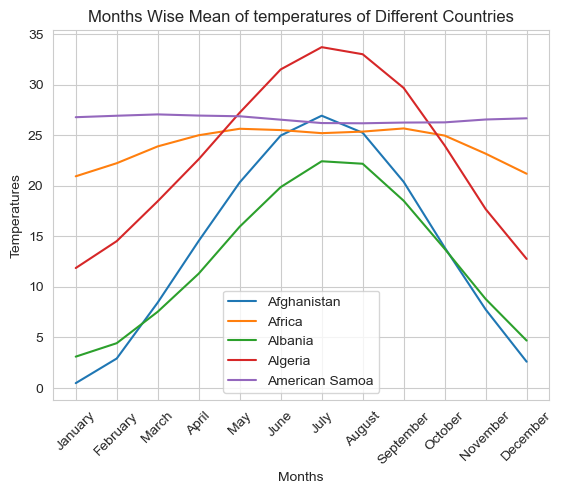

In [52]:
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.title('Months Wise Mean of temperatures of Different Countries')
for x in dataset2.columns[0:5]:
    plt.plot(dataset2.index,dataset2[x],label=x)
_=plt.xticks(rotation=45)    
plt.legend()

## Part 2

## Part 3

###   Global Average Land Temperature by Cities (GlobalLandTemperaturesByMajorcity.csv)

Include the following cities in analysis

1 Delhi  
2.Bombay  
3.Madras  
4.Bangalore  
5.Calcutta  

## Questions
1 to know the avg temperature for different states by a period of [25years]    
2.which city has highest mean temperature   
3.which city has lowest mean temperature      
4.In a city  to know the mean  temperatures by months (mean of months in every year)   
5.the variation in temperatures by longitudes 